# Module tests

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from myupmask.upmask.dimred import pca_dimred
from myupmask.upmask.clustering import kmeans
from myupmask.upmask.spatialtest import sp_test_groups
from myupmask.data.loader import load_test_data

## Load data and visualization

In [4]:
# Loading test data
spatial_pos, data, labels, df = load_test_data()

In [5]:
df.head()

x         y      pm_x      pm_y  parallax  label
0  0.829094  0.438600 -1.026683  0.380610  0.011152    0.0
1  0.375040  0.207028  1.453712  2.093929  0.028184    0.0
2  0.962194  0.686499  2.557089  0.179907  0.009567    0.0
3  0.490843  0.051106  2.637360 -1.658258  0.002594    0.0
4  0.330184  0.138919 -0.575092  0.069711  0.021999    0.0

<Axes: xlabel='x', ylabel='y'>

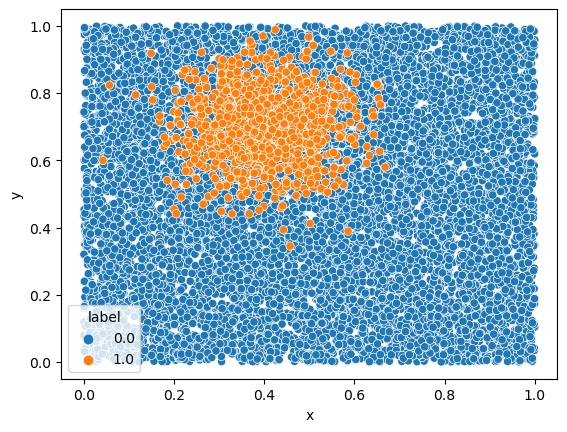

In [6]:
sns.scatterplot(data=df, x="x", y="y", hue="label")

<Axes: xlabel='pm_x', ylabel='pm_y'>

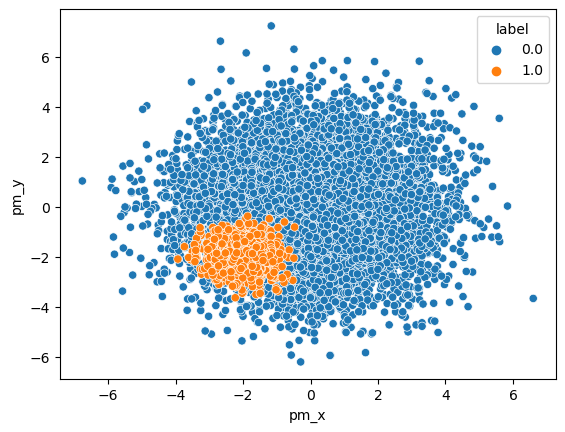

In [7]:
sns.scatterplot(data=df, x="pm_x", y="pm_y", hue="label")

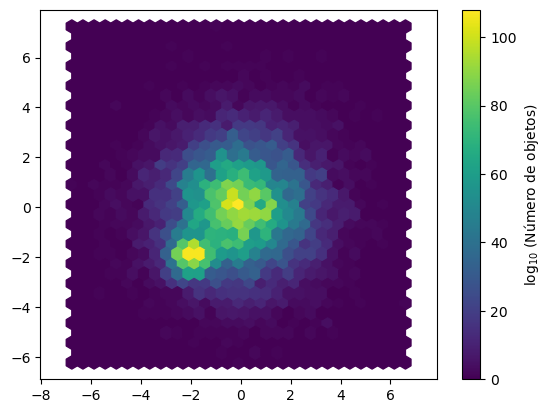

In [8]:

x = df.pm_x.to_numpy()
y = df.pm_y.to_numpy()
plt.hexbin(x, y, gridsize=30)
plt.axis("equal")
cb = plt.colorbar()
cb.set_label(r"log$_{10}$ (Número de objetos)")

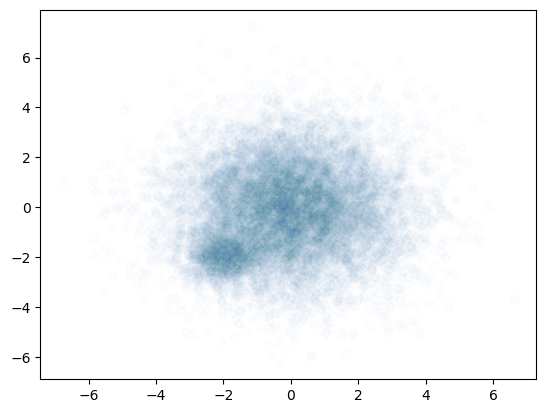

In [9]:
plt.scatter(data[:,0], data[:,1], alpha=0.01);

In [10]:
data.shape

(11000, 2)

## Clustering

In [11]:
# 11 clusters to match the number of expeted number of objects per group
plabels = kmeans(data, n_clusters=11)  

In [12]:
df["km_label"] = list(plabels)

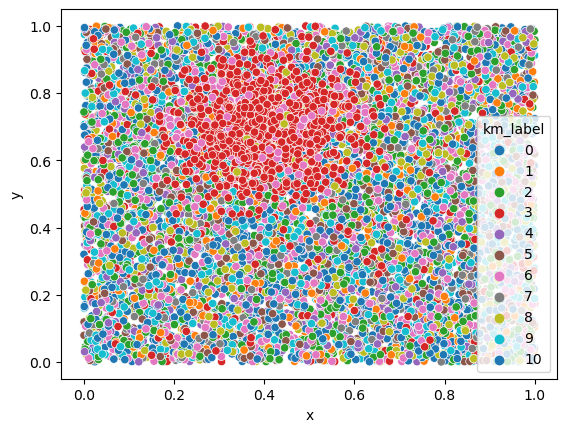

In [13]:
sns.scatterplot(data=df, x="x", y="y", hue="km_label", palette="tab10");

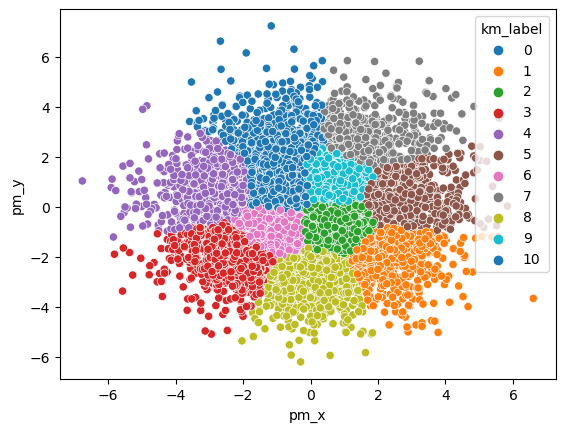

In [14]:
sns.scatterplot(data=df, x="pm_x", y="pm_y", hue="km_label", palette="tab10");

# Ripley’s K function

Used to assess the closeness of a cluster to a random uniform distribution

In [15]:
# Kest = RipleysKEstimator(area=1, x_max=1, y_max=1, x_min=0, y_min=0)
# C_s = rjctRandField.rkfunc(clust_xy[cl_msk], Kest)

In [16]:
import numpy as np
from astropy.stats import RipleysKEstimator

In [17]:
Kest = RipleysKEstimator(area=1, x_max=1, y_max=1, x_min=0, y_min=0)

In [18]:
def ripley(data: np.ndarray, Kest: RipleysKEstimator) -> tuple[np.ndarray, np.ndarray]:
    rad = np.linspace(.01, .25, 50)
    L_t = Kest.Lfunction(data, rad, mode="translation")
    return rad, L_t

In [19]:
test_data = np.linspace(.01, .25, 22000).reshape(11000,2) 
rad = np.linspace(.01, .25, 50)

In [20]:
L_t = Kest.Lfunction(data, rad, mode="translation")

In [21]:
rad

array([0.01      , 0.01489796, 0.01979592, 0.02469388, 0.02959184,
       0.0344898 , 0.03938776, 0.04428571, 0.04918367, 0.05408163,
       0.05897959, 0.06387755, 0.06877551, 0.07367347, 0.07857143,
       0.08346939, 0.08836735, 0.09326531, 0.09816327, 0.10306122,
       0.10795918, 0.11285714, 0.1177551 , 0.12265306, 0.12755102,
       0.13244898, 0.13734694, 0.1422449 , 0.14714286, 0.15204082,
       0.15693878, 0.16183673, 0.16673469, 0.17163265, 0.17653061,
       0.18142857, 0.18632653, 0.19122449, 0.19612245, 0.20102041,
       0.20591837, 0.21081633, 0.21571429, 0.22061224, 0.2255102 ,
       0.23040816, 0.23530612, 0.24020408, 0.24510204, 0.25      ])

In [22]:
L_t

array([0.00160422, 0.00243107, 0.00326774, 0.00407122, 0.00491084,
       0.00570731, 0.00654589, 0.00735483, 0.0081784 , 0.0090023 ,
       0.00986139, 0.01073263, 0.01159433, 0.01245436, 0.01330903,
       0.01416556, 0.01504119, 0.01590456, 0.01677446, 0.01765753,
       0.018537  , 0.01942593, 0.02030114, 0.02118631, 0.02206299,
       0.02295615, 0.02384906, 0.02475002, 0.02565473, 0.02656986,
       0.02748692, 0.02839446, 0.02932393, 0.03027197, 0.03121425,
       0.03215166, 0.0331043 , 0.03405925, 0.03500727, 0.03597238,
       0.03694456, 0.03792028, 0.03889524, 0.03985497, 0.04084426,
       0.0418153 , 0.04280723, 0.04380498, 0.04480458, 0.04581747])

In [23]:
np.isnan(L_t).all()

False

In [24]:
C_s = np.nanmax(abs(L_t - rad))
print(f"{C_s=:.4}")

C_s=0.2042


In [25]:
# Test
# Cantidad de objetos en el cluster
nobjects = 11_000 #  cl_msk.sum()
C_thresh = 1.68 / nobjects
print(C_thresh)

0.00015272727272727272


Appling clustering and then K function

In [26]:
groups = np.unique(plabels)
print(groups)

[ 0  1  2  3  4  5  6  7  8  9 10]


group=0
C_thresh=0.001276595744680851
C_s=0.0010874331915403934
False


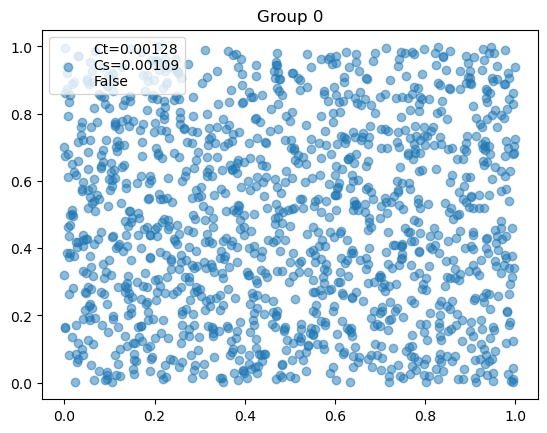


group=1
C_thresh=0.0027450980392156863
C_s=0.0025314776683107165
False


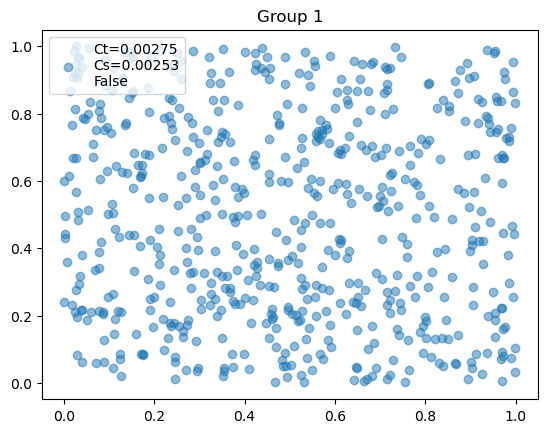


group=2
C_thresh=0.0011467576791808873
C_s=0.003058731975867396
True


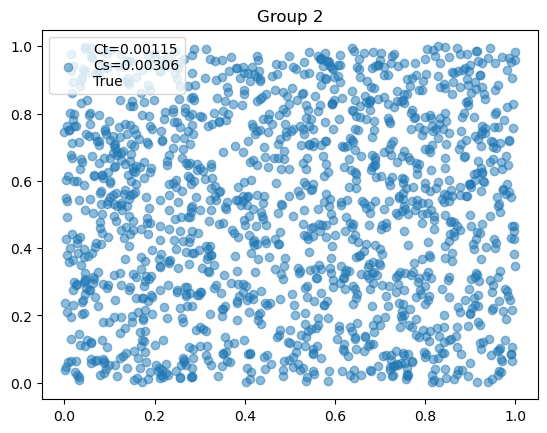


group=3
C_thresh=0.0011618257261410787
C_s=0.14305710303843844
True


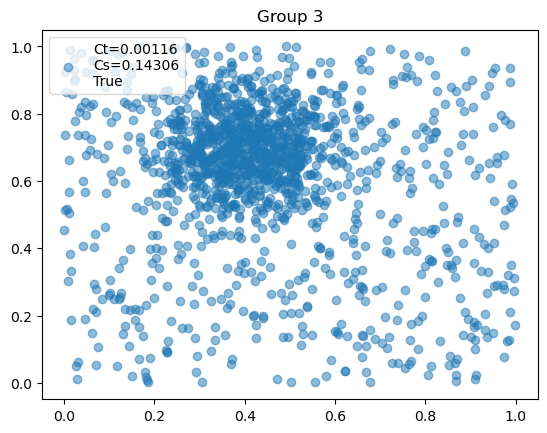


group=4
C_thresh=0.002198952879581152
C_s=0.0020476881596112606
False


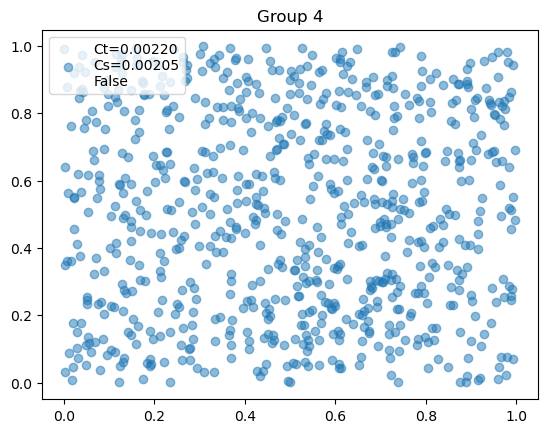


group=5
C_thresh=0.0020388349514563107
C_s=0.0005333088864976354
False


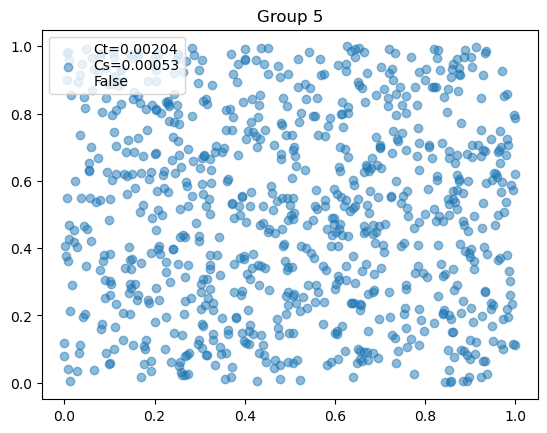


group=6
C_thresh=0.0012952968388589051
C_s=0.007245009572777739
True


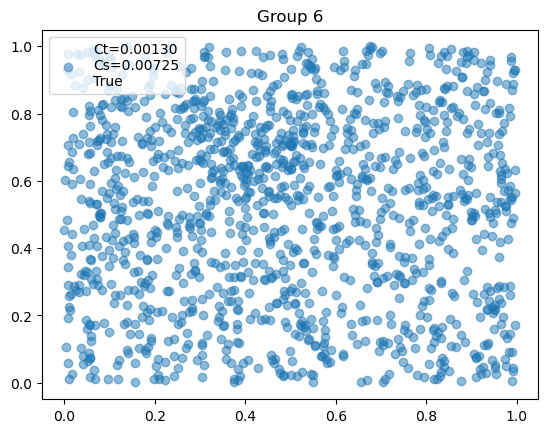


group=7
C_thresh=0.0030939226519337017
C_s=0.0013675203466151364
False


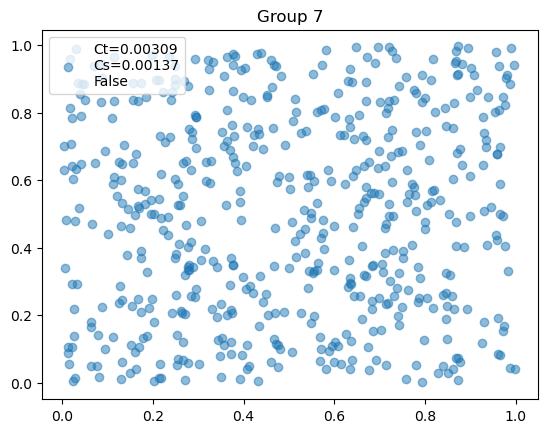


group=8
C_thresh=0.00208955223880597
C_s=0.0009062497950921428
False


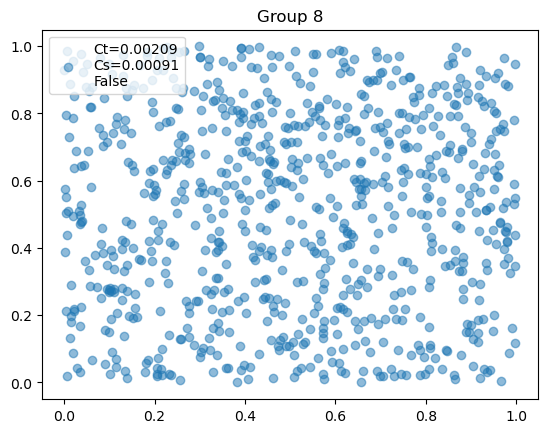


group=9
C_thresh=0.001405857740585774
C_s=0.001735652256168313
True


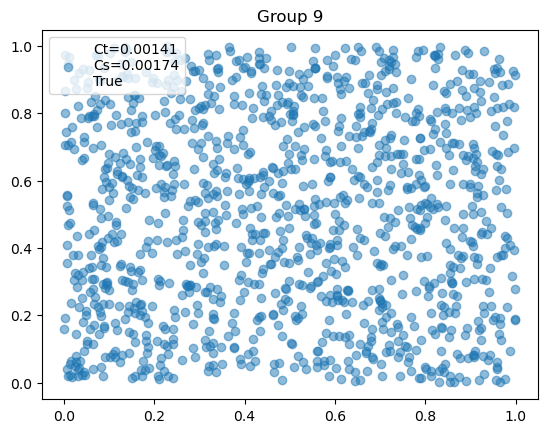


group=10
C_thresh=0.0022888283378746594
C_s=0.0012548890878595897
False


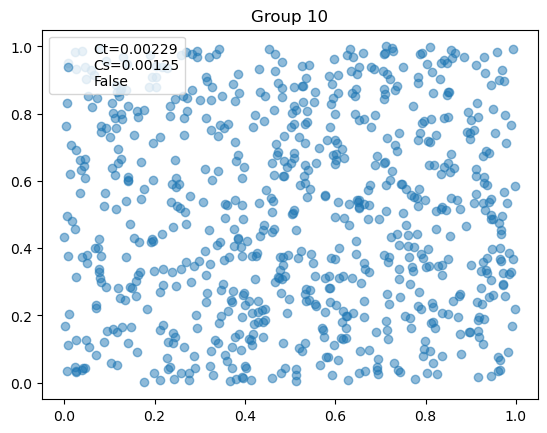

In [27]:
for group in groups:
    print(f"{group=}")
    group_data = spatial_pos[plabels == group]
    rad, L_t = ripley(group_data, Kest)
    C_s = np.nanmax(abs(L_t - rad))
    C_thresh = 1.68 / group_data.shape[0]
    print(f"{C_thresh=}")
    print(f"{C_s=}")
    print(f"{C_s >= C_thresh}")
    plt.scatter(group_data[:,0], group_data[:,1], alpha=0.5, label=f"Ct={C_thresh:0.5f}\nCs={C_s:0.5f}\n{C_s >= C_thresh}")
    plt.legend(loc='upper left')
    plt.title(f"Group {group}")
    plt.show()
    print()


Usando HDBSCAN

In [28]:
import hdbscan

In [29]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=300)
clusterer.fit(data)
print(np.unique(clusterer.labels_, return_counts=True))

(array([-1,  0,  1]), array([8088,  707, 2205]))


In [30]:
labels = clusterer.labels_

In [31]:
df["hdbscan_label"] = list(labels)

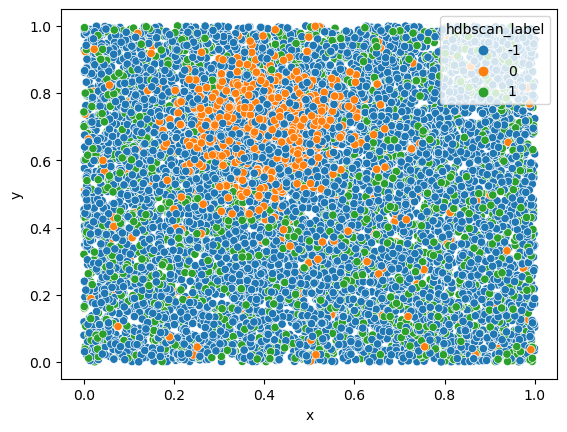

In [32]:
sns.scatterplot(data=df, x="x", y="y", hue="hdbscan_label", palette="tab10",);

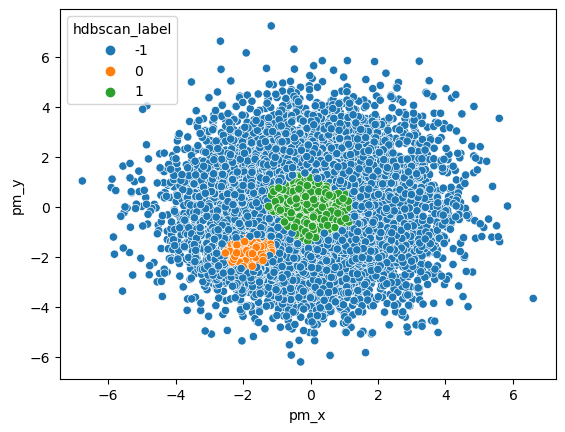

In [33]:
sns.scatterplot(data=df, x="pm_x", y="pm_y", hue="hdbscan_label", palette="tab10");

In [34]:
groups = np.unique(labels)
groups = groups[groups >= 0]
groups

array([0, 1])

group=0
group_data.shape[0]=707
C_thresh=0.002376237623762376
C_s=0.17931128382481226
True


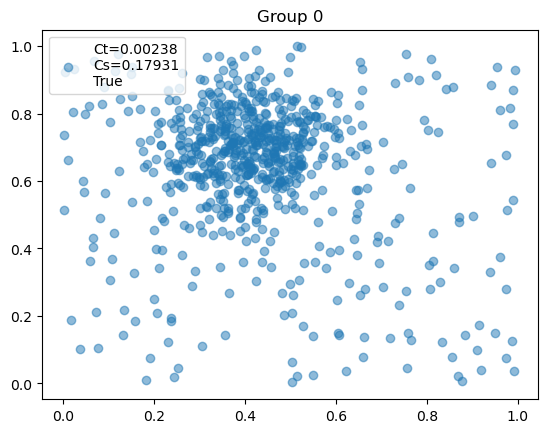


group=1
group_data.shape[0]=2205
C_thresh=0.0007619047619047619
C_s=0.0021432113617234627
True


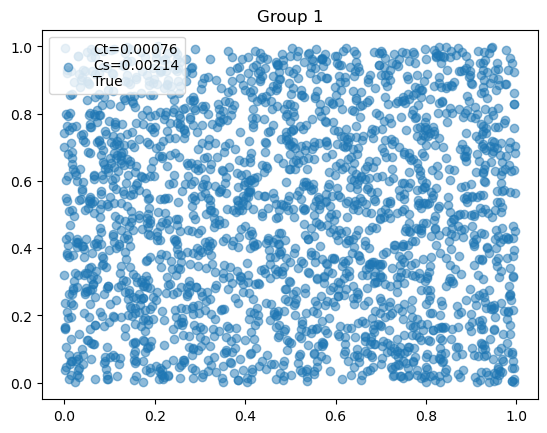

In [35]:
for group in groups:
    print(f"{group=}")
    group_data = spatial_pos[labels == group]
    rad, L_t = ripley(group_data, Kest)
    C_s = np.nanmax(abs(L_t - rad))
    C_thresh = 1.68 / group_data.shape[0]
    print(f"{group_data.shape[0]=}")
    print(f"{C_thresh=}")
    print(f"{C_s=}")
    print(f"{C_s >= C_thresh}")
    plt.scatter(group_data[:,0], group_data[:,1], alpha=0.5, label=f"Ct={C_thresh:0.5f}\nCs={C_s:0.5f}\n{C_s >= C_thresh}")
    plt.legend(loc='upper left')
    plt.title(f"Group {group}")
    plt.show()
    print()

In [36]:
# Repeat only for the survining groups


In [37]:
# check_data_spatially_clustered(plabels, spatial_pos)

In [ ]:
ITERATIONS = 10
for i in range(ITERATIONS):
    kmeans(data, n_clusters=11)
    indxs = sp_test_groups(plabels, spatial_pos)
    data = data[indxs]
    plabels = kmeans(data, n_clusters=11)


